In [5]:
from cgi import test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler, scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn import decomposition, datasets
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import pickle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
%matplotlib inline

In [6]:
df=pd.DataFrame(pd.read_excel("diabetes-dataset.xlsx"))

In [7]:
df.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.182500      69.145500      20.935000    80.254000   
std       3.306063    32.068636      19.188315      16.103243   111.180534   
min       0.000000     0.000000       0.000000       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000     110.000000   744.000000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.193000                  0.470930    33.090500     0.342000  
std       8.149901                  0.323553    11.786423     0.474498  
min       0.000000                  0.078000    21.000000     0.000000  
25%      27.375000                  0.244000    24.000000     0.000000  
50%      32.300000                  0.376000    29.000000     0.000000  
75%      36.800000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

In [8]:
def prepare_data(df):
    print(df.describe)
    corr_mat = df.corr()
    p = df.hist(figsize = (10,10))
    mat_plot(corr_mat)

In [9]:
def mat_plot(corr_mat):
    f,ax = plt.subplots(figsize = (8,6))
    sns.heatmap(corr_mat,cmap = "GnBu",annot = True, fmt = '.1f',ax = ax)
    plt.show()

In [10]:
def preprocess(df):
    diab_df_cpy = df.copy(deep = True)
    diab_df_cpy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)
    diab_df_cpy['Glucose'].fillna(diab_df_cpy['Glucose'].mean(), inplace = True)
    diab_df_cpy['BloodPressure'].fillna(diab_df_cpy['BloodPressure'].mean(), inplace = True)
    diab_df_cpy['SkinThickness'].fillna(diab_df_cpy['SkinThickness'].median(), inplace = True)
    diab_df_cpy['Insulin'].fillna(diab_df_cpy['Insulin'].median(), inplace = True)
    diab_df_cpy['BMI'].fillna(diab_df_cpy['BMI'].median(), inplace = True)
    return diab_df_cpy

In [12]:
def scale_data(diab_df_cpy):
    sc_x = StandardScaler()
    X =  pd.DataFrame(sc_x.fit_transform(diab_df_cpy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
    return X


In [13]:
def visualizer(diab_df_cpy):
    fig=px.histogram(diab_df_cpy,x='Age',marginal='violin')
    fig.update_layout(bargap=0.2)
    fig.show()
    sns.countplot(data=diab_df_cpy,x='Outcome',palette='coolwarm')

    fig=px.histogram(diab_df_cpy,x=diab_df_cpy[diab_df_cpy.Outcome==0].Age,marginal='box',title='Age distribution with outcome 0',color_discrete_sequence=['green'])
    fig.update_layout(bargap=0.1)
    fig.show()

    fig=px.histogram(diab_df_cpy,x=diab_df_cpy[diab_df_cpy.Outcome==1].Age,marginal='box',title='Age distribution with outcome 1',color_discrete_sequence=['darkred'])
    fig.update_layout(bargap=0.1)
    fig.show()


    fig = px.box(diab_df_cpy, y="Pregnancies", x="Outcome")
    fig.show()


    plt.subplots(figsize=(15,10))
    sns.boxplot(x='Age', y='BMI', data=diab_df_cpy)
    plt.show()

    data_plot = sns.lmplot('Insulin','Age',data = diab_df_cpy, hue = 'Outcome',fit_reg = 'False')


In [14]:
def split_train_test(diab_df_cpy):

    y = diab_df_cpy.iloc[:,-1:]
    x = diab_df_cpy.iloc[:,:-1]

    X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2,random_state = 8)

    column_lis = list(diab_df_cpy.columns[:-1])

    ### SMOTE ANALYSIS FOR IMBALANCED DATASET
    print("Percentage of Positive Values in training data before Smote :",Y_train.value_counts(normalize=True)[1]/(Y_train.value_counts(normalize=True)[0]+Y_train.value_counts(normalize=True)[1])*100,"%")
    print("Percentage of Negative Values in training data before Smote :",Y_train.value_counts(normalize=True)[0]/(Y_train.value_counts(normalize=True)[0]+Y_train.value_counts(normalize=True)[1])*100,"%")

    smote = SMOTE()
    X_train,Y_train = smote.fit_resample(X_train,Y_train)
    return X_train,Y_train,X_test,Y_test
    #print("Shape of X after SMOTE: ",X_train.shape)

In [15]:
diab_df_cpy = preprocess(df)
diab_df = scale_data(diab_df_cpy)
X_train,Y_train,X_test,Y_test = split_train_test(diab_df_cpy)


Percentage of Positive Values in training data before Smote : 34.3125 %
Percentage of Negative Values in training data before Smote : 65.6875 %


In [16]:
diab_df_cpy.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness     Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.00000   
mean      3.703500   121.975340      72.403665      29.243500   140.48200   
std       3.306063    30.533114      11.949531       9.124957    81.56284   
min       0.000000    44.000000      24.000000       7.000000    14.00000   
25%       1.000000    99.000000      64.000000      25.000000   120.00000   
50%       3.000000   118.000000      72.000000      29.000000   126.00000   
75%       6.000000   141.000000      80.000000      32.000000   130.00000   
max      17.000000   199.000000     122.000000     110.000000   744.00000   

               BMI  DiabetesPedigreeFunction          Age      Outcome  
count  2000.000000               2000.000000  2000.000000  2000.000000  
mean     32.646600                  0.470930    33.090500     0.342000  
std       7.190196                  0.323553    11.786423     0.474498  
min      18.200000                  0.078000    21.000000     0.000000  
25%      27.600000                  0.244000    24.000000     0.000000  
50%      32.400000                  0.376000    29.000000     0.000000  
75%      36.800000                  0.624000    40.000000     1.000000  
max      80.600000                  2.420000    81.000000     1.000000

In [90]:
diab_df.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.515394  0.524960      -0.870852       0.631010 -0.177601  0.132630   
1    -1.120495 -1.244054       0.803273       0.192542 -0.189864  0.772550   
2    -1.120495  0.754277       0.000000      -0.026692 -0.177601  1.607229   
3    -1.120495  0.426682      -0.368614       1.398329  1.343080  1.342914   
4    -0.817945  0.557720      -0.870852       1.288712  4.163696  1.120333   

   DiabetesPedigreeFunction       Age  
0                 -1.063246  1.180424  
1                 -0.735551 -0.856326  
2                  0.491759 -0.177409  
3                 -0.327478 -0.771462  
4                  0.201161 -1.026055

In [91]:
def dtree_classifier():
    print("----------DTREE CLASSIFIER---------")
    column_lis = X_train.columns
    dtree = DecisionTreeClassifier(max_depth = 15,random_state = 0, 
                                min_samples_split = 2)
    dtree = dtree.fit(X_train,Y_train)
    Y_pred = dtree.predict(X_test)
    #Change using streamlit lib
    accu_score_dtree = metrics.accuracy_score(Y_test,Y_pred)*100
    print("Validation Accuracy of Decision Tree Classifier = {}".format(accu_score_dtree))
    res['Decision Tree'] = accu_score_dtree
    vis_dtree(dtree,Y_pred)
    pickle_dt = open("dtree_classifier.pkl",mode = "wb")
    pickle.dump(dtree,pickle_dt)
    pickle_dt.close()
    return 1

In [92]:
X_train

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
0               2  122.000000      52.000000      43.000000  158.000000   
1               6  105.000000      70.000000      32.000000   68.000000   
2               1   97.000000      68.000000      21.000000  126.000000   
3               1  118.000000      58.000000      36.000000   94.000000   
4               2  129.000000      72.403665      29.000000  126.000000   
...           ...         ...            ...            ...         ...   
2097            6  166.313038      61.709601      34.561280  383.412959   
2098            0  179.000000      50.000000      36.000000  159.000000   
2099            0  144.905895      73.306725      29.282314  126.000000   
2100            4  111.082761      74.611492      32.751716  122.331046   
2101            2  106.429431      85.796655      29.632776  126.000000   

            BMI  DiabetesPedigreeFunction  Age  
0     36.200000                  0.816000   28  
1     30.800000                  0.122000   37  
2     27.200000                  1.095000   22  
3     33.300000                  0.261000   23  
4     38.500000                  0.304000   41  
...         ...                       ...  ...  
2097  38.700937                  0.596492   38  
2098  37.800000                  0.455000   22  
2099  43.663603                  0.622848   31  
2100  30.468739                  0.332446   26  
2101  31.875719                  0.607124   37  

[2102 rows x 8 columns]

In [93]:
def vis_dtree(model,Y_pred):
    column_lis = X_train.columns
    conf_mat = confusion_matrix(Y_test,Y_pred)
    plt.figure(figsize = (7,5))
    sns.heatmap(conf_mat,annot = True)
    plt.show()
    plt.figure(figsize = (7,5))
    pd.Series(model.feature_importances_,index = column_lis).plot(kind = 'barh')
    plot_dtree(model,X_train)
    return

In [94]:
def plot_dtree(model_name,train_data):
    fig = plt.figure(figsize=(250,200))
    _ = tree.plot_tree(
        model_name,
        feature_names = train_data.columns,
        class_names = ['NEGATIVE','POSTIVE'],
        filled = True
    )
    fig.savefig("decision_tree.png")
    return

In [95]:
Y_train_arr = Y_train['Outcome'].ravel()

In [96]:
def rf_classifier(perm):
    Y_train_arr = np.array(Y_train['Outcome'])
    rfc = RandomForestClassifier(n_estimators = 500)
    rfc.fit(X_train,Y_train_arr) 
    # Overfitted
    # y_train_rfc = rfc.predict(x_train_scaled)
    # print("TRAINING Accuracy Score = {}".format(metrics.accuracy_score(Y_train,y_train_rfc)))
    rfc_cv = hyper_param_model(rfc)
    print("RFC Score = {}%".format(rfc.score(X_test,Y_test)*100))
    y_pred_rfc = rfc_cv.predict(X_test)
    test_accu_score = metrics.accuracy_score(Y_test,y_pred_rfc)*100
    y_train_rfc = rfc_cv.predict(X_train)
    print("TRAINING Accuracy Score = {}".format(metrics.accuracy_score(Y_train,y_train_rfc)))
    vis_rf(rfc_cv,y_pred_rfc,perm)
    return y_pred_rfc,test_accu_score

In [97]:
def vis_rf(model,y_pred_rfc,perm):
        #Classification Report
        report_rfc = classification_report(Y_test,y_pred_rfc)
        print(report_rfc)
        rfc_cros_valid = hyper_param_model(model)
        y_pred_rfc_cv = rfc_cros_valid.predict(X_test)
        test_accu_score_rf = metrics.accuracy_score(Y_test,y_pred_rfc_cv)*100
        res['Random Forest'] = test_accu_score_rf
        print("Accuracy Score:- {}%".format(test_accu_score_rf))
        print("Training Accuracy Score = {}%".format(metrics.accuracy_score(Y_train,rfc_cros_valid.predict(X_train))*100))
        mat_rfc_cros_valid = confusion_matrix(Y_test,y_pred_rfc_cv)
        if perm == 0:
            heat_mp_rfc = plt.figure(figsize = (25,20))
            sns.heatmap(mat_rfc_cros_valid,annot = True,annot_kws={"fontsize":75})
            plt.savefig("pages/images/heat_rfc.png")
            # st.pyplot(heat_mp_rfc)
            roc_plot(model)
        elif perm == 1:
            f_imp_plot = plt.figure(figsize = (100,50))
            pd.Series(rfc_cros_valid.feature_importances_,index = X_train.columns).plot(kind = 'barh',fontsize = 100)
            #st.pyplot(f_imp_plot)
            plt.savefig("pages/images/f_imp.png")
        return



In [98]:
def roc_plot(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr,tpr, thresholds = roc_curve(Y_test,y_pred_prob)
    plt.figure(figsize=(7,10))
    plt.plot([0,1] , [0,1],'k-')
    plt.plot(fpr,tpr,label = 'Knn')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC Curve')
    plt.show()
    print("Area under ROC/AUC Curve = {}%".format(roc_auc_score(Y_test,y_pred_prob)*100))


In [99]:
def hyper_param_model(model):
    
    param_grid_aug = {
        'n_estimators':[500],
        'max_features':['sqrt','log2'], #range of values ex - 5 to 15
        'max_depth':[27],#[i for i in range (25,30)]
        'max_leaf_nodes': [173], #set to range of values 5 to 15 [i for i in range (150,181)]
        'criterion':['gini'],
        'min_samples_leaf':[1], #NOT create range from 20 to 50 in steps of 5
    }

    Y_train_arr = Y_train['Outcome'].ravel()
    CV_rfc_aug = GridSearchCV(estimator = model,param_grid = param_grid_aug,cv = 5,n_jobs = -1)
    CV_rfc_aug.fit(X_train,Y_train_arr)
    rfc_cros_valid = CV_rfc_aug. best_estimator_
    pickle_rf = open("rf_classifier.pkl",mode = "wb")
    pickle.dump(rfc_cros_valid,pickle_rf)
    pickle_rf.close()
    return rfc_cros_valid

In [100]:
def log_regression():
    print("\n-----LOGISTIC REGRESSION-----\n")
    log_reg=linear_model.LogisticRegression(max_iter=50000)
    Y_train_arr = Y_train['Outcome'].ravel()
    log_reg.fit(X_train,Y_train_arr)
    log_reg_cv = hyper_logreg(log_reg)
    predicted=log_reg_cv.predict(X_test)
    test_accu_score = metrics.accuracy_score(Y_test,predicted)*100
    res['Logistic Regression'] = test_accu_score
    vis_logreg(log_reg,predicted)
    return 1

In [101]:

res = dict.fromkeys(['Random Forest','Decision Tree','Logistic Regression','SVC'])


In [102]:
def vis_logreg(model,predicted):
    Y_train_arr = Y_train['Outcome'].ravel()

    cf_matrix = confusion_matrix(Y_test,predicted)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
                fmt='.2%', cmap='Blues')
    plt.show()
    
    #Plot results comparison graph
    coeff = list(model.coef_[0])
    labels = list(X_train.columns)
    features = pd.DataFrame()
    features['Features'] = labels
    features['importance'] = coeff
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features['positive'] = features['importance'] > 0
    features.set_index('Features', inplace=True)
    features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
    plt.xlabel('Importance')
    log_reg_cv = hyper_logreg(model)
    roc_plot(log_reg_cv)
    pickle_lr = open("logreg.pkl",mode = "wb")
    pickle.dump(log_reg_cv,pickle_lr)
    pickle_lr.close()
    return

In [103]:
def hyper_logreg(model):
    c_space = np.logspace(-1,2,15)
    param_grid = {'solver':['newton-cg', 'lbfgs', 'liblinear'],'C':c_space}
    log_reg_cv = GridSearchCV(model,param_grid,cv = 5)
    log_reg_cv.fit(X_train,Y_train_arr)
    print("Validation Accuracy of improved model = {}".format(log_reg_cv.best_score_))
    return log_reg_cv


In [104]:
diab_df_cpy.iloc[:,-1:]

Outcome
0           1
1           0
2           1
3           1
4           0
...       ...
1995        0
1996        1
1997        0
1998        1
1999        0

[2000 rows x 1 columns]

In [105]:
diab_df_cpy.iloc[:,:-1]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2    138.0      62.000000           35.0    126.0  33.6   
1               0     84.0      82.000000           31.0    125.0  38.2   
2               0    145.0      72.403665           29.0    126.0  44.2   
3               0    135.0      68.000000           42.0    250.0  42.3   
4               1    139.0      62.000000           41.0    480.0  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2     75.0      64.000000           24.0     55.0  29.7   
1996            8    179.0      72.000000           42.0    130.0  32.7   
1997            6     85.0      78.000000           29.0    126.0  31.2   
1998            0    129.0     110.000000           46.0    130.0  67.1   
1999            2     81.0      72.000000           15.0     76.0  30.1   

      DiabetesPedigreeFunction  Age  
0                        0.127   47  
1                        0.233   23  
2                        0.630   31  
3                        0.365   24  
4                        0.536   21  
...                        ...  ...  
1995                     0.370   33  
1996                     0.719   36  
1997                     0.382   42  
1998                     0.319   26  
1999                     0.547   25  

[2000 rows x 8 columns]

In [106]:
def sv_classifier():
    print("--------SVC Classifier--------\n")
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    diab_df_cpy = preprocess(df)
    diab_df_cpy_up = diab_df_cpy[~((diab_df_cpy < (Q1 - 1.5 * IQR)) |(diab_df_cpy > (Q3 + 1.5 * IQR))).any(axis=1)]
    y = diab_df_cpy_up.iloc[:,-1:]
    x = diab_df_cpy_up.iloc[:,:-1]
    x_train_svc,x_test_svc,y_train_svc,y_test_svc = train_test_split(x,y,test_size = 0.2,random_state = 8)
    # x_train_svc,x_test_svc,y_train_svc,y_test_svc = train_test_split(diab_df_cpy_up,diab_df_cpy_up.iloc[:,-1:],test_size = 0.2,random_state=8)
    # print(x_train_svc)
    # diab_df_cpy = scale_data(diab_df_cpy_up)
    y_train_arr_svc = y_train_svc['Outcome'].ravel()
    classifier = SVC(kernel = 'rbf',probability = True)
    classifier.fit(x_train_svc,y_train_arr_svc)
    # Hyperparameter Tuning
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}
    grid = GridSearchCV(classifier,param_grid,refit = True, verbose = 0)
    grid.fit(x_train_svc,y_train_arr_svc)
    grid_cv = grid.best_estimator_
    grid_prediction = grid_cv.predict(x_test_svc)
    mat_svm = confusion_matrix(y_test_svc['Outcome'],grid_prediction)
    plt.figure(figsize = (7,5))
    sns.heatmap(mat_svm,annot = True)
    print(classification_report(y_test_svc['Outcome'],grid_prediction))
    test_accu_score_svc = accuracy_score(y_test_svc['Outcome'], grid_prediction)*100
    print("Validation Accuracy Score [SVC] = {}%".format(test_accu_score_svc))
    res['SVC'] = test_accu_score_svc
    # roc_plot(grid_cv)
    pickle_svm = open("svc_classifier.pkl",mode = "wb")
    pickle.dump(grid_cv,pickle_svm)
    pickle_svm.close()
    return test_accu_score_svc



--------SVC Classifier--------

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       253
           1       1.00      0.98      0.99        98

    accuracy                           0.99       351
   macro avg       1.00      0.99      0.99       351
weighted avg       0.99      0.99      0.99       351

Validation Accuracy Score [SVC] = 99.43019943019942%


99.43019943019942

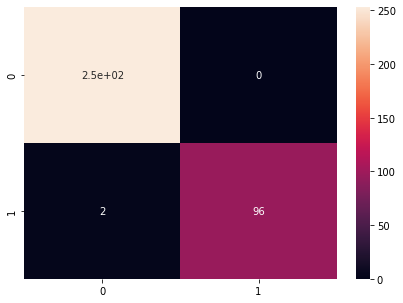

In [107]:
sv_classifier()

RFC Score = 98.5%
TRAINING Accuracy Score = 1.0
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       265
           1       0.96      1.00      0.98       135

    accuracy                           0.98       400
   macro avg       0.98      0.99      0.98       400
weighted avg       0.99      0.98      0.99       400

Accuracy Score:- 98.5%
Training Accuracy Score = 100.0%


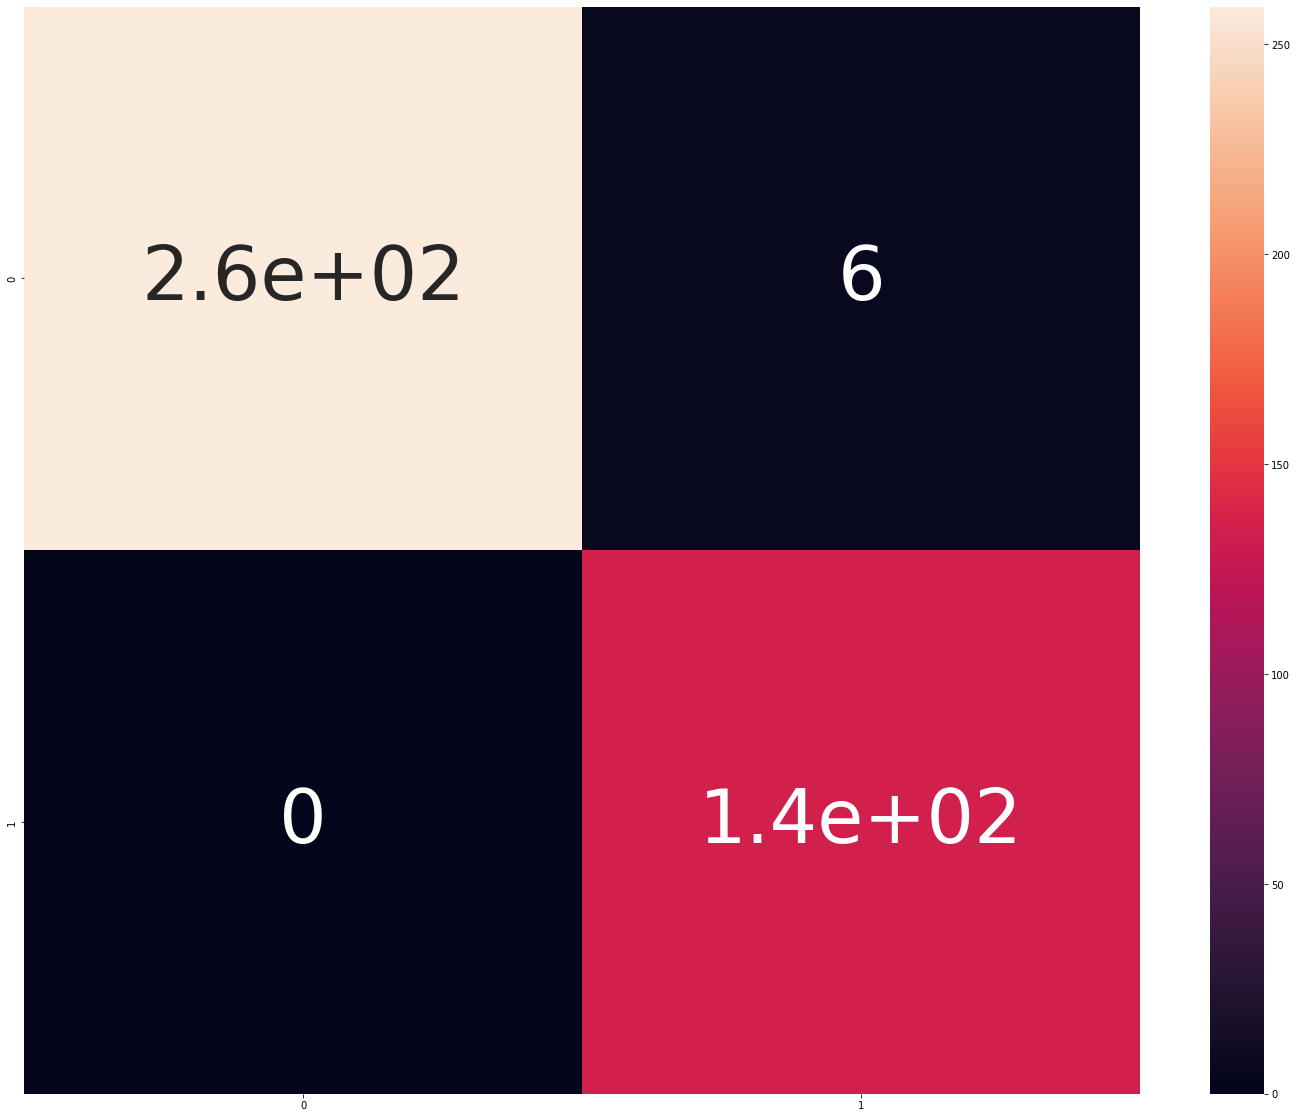

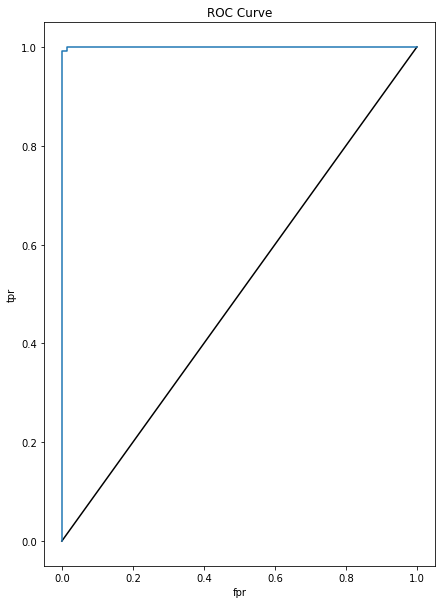

Area under ROC/AUC Curve = 99.98881900768693%


In [108]:
if __name__ == "__main__":
    rf_classifier(0)


-----LOGISTIC REGRESSION-----

Validation Accuracy of improved model = 0.7492828865512952


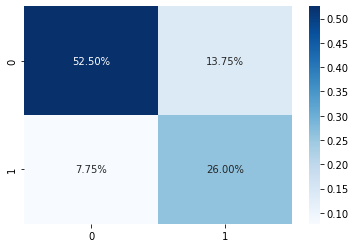

Validation Accuracy of improved model = 0.7492828865512952


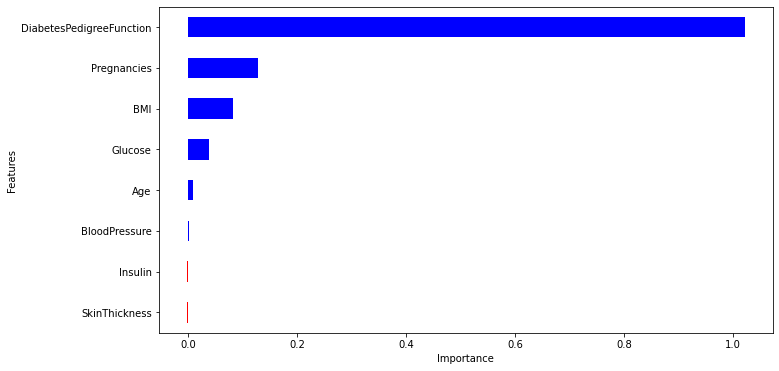

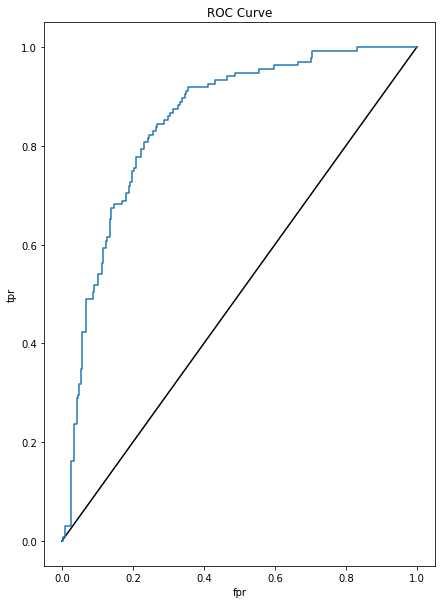

Area under ROC/AUC Curve = 84.95597484276729%


1

In [109]:
log_regression()

In [110]:
diab_df_cpy = preprocess(df)

--------SVC Classifier--------

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       253
           1       1.00      0.98      0.99        98

    accuracy                           0.99       351
   macro avg       1.00      0.99      0.99       351
weighted avg       0.99      0.99      0.99       351

Validation Accuracy Score [SVC] = 99.43019943019942%


99.43019943019942

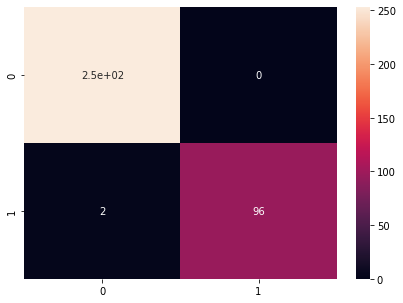

In [111]:
sv_classifier()

In [112]:
pickle_in = open('rf_classifier.pkl','rb')
classifier = pickle.load(pickle_in)

In [113]:
diab_df_cpy

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2    138.0      62.000000           35.0    126.0  33.6   
1               0     84.0      82.000000           31.0    125.0  38.2   
2               0    145.0      72.403665           29.0    126.0  44.2   
3               0    135.0      68.000000           42.0    250.0  42.3   
4               1    139.0      62.000000           41.0    480.0  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2     75.0      64.000000           24.0     55.0  29.7   
1996            8    179.0      72.000000           42.0    130.0  32.7   
1997            6     85.0      78.000000           29.0    126.0  31.2   
1998            0    129.0     110.000000           46.0    130.0  67.1   
1999            2     81.0      72.000000           15.0     76.0  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.127   47        1  
1                        0.233   23        0  
2                        0.630   31        1  
3                        0.365   24        1  
4                        0.536   21        0  
...                        ...  ...      ...  
1995                     0.370   33        0  
1996                     0.719   36        1  
1997                     0.382   42        0  
1998                     0.319   26        1  
1999                     0.547   25        0  

[2000 rows x 9 columns]

In [114]:
sc_x = StandardScaler()
arr = np.array([0.0,84.0,82.000000,31.0,125.0,38.2,0.233,23.0]).reshape(1,8)
sc_arr = sc_x.fit_transform(arr)
print(classifier.predict(sc_arr))

[0]


C:\Users\Santosh Vishwanathan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [115]:
X_test.iloc[0,:]

Pregnancies                   2.000
Glucose                      90.000
BloodPressure                68.000
SkinThickness                42.000
Insulin                     126.000
BMI                          38.200
DiabetesPedigreeFunction      0.503
Age                          27.000
Name: 1859, dtype: float64

In [116]:
res


{'Random Forest': 98.5,
 'Decision Tree': None,
 'Logistic Regression': 78.5,
 'SVC': 99.43019943019942}

----------DTREE CLASSIFIER---------
Validation Accuracy of Decision Tree Classifier = 97.25


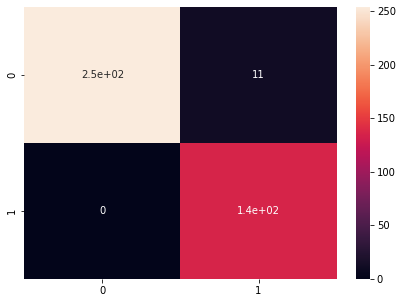

1

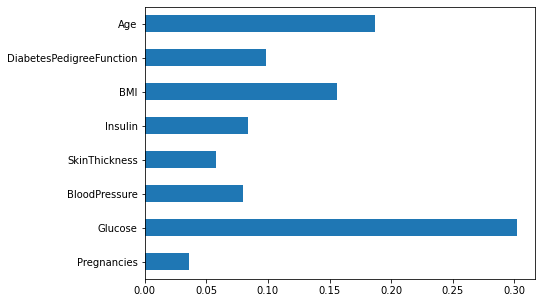

In [117]:
dtree_classifier()

In [118]:
import tkinter.font as TkFont

In [119]:
import fontstyle

In [120]:
text = fontstyle.apply('GEEKSFORGEEKS', 'bold/Italic/red/GREEN_BG')

In [121]:
print(text)

GEEKSFORGEEKS


In [122]:
X_test.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1859            2     90.0           68.0           42.0    126.0  38.2   
1059            1    124.0           74.0           36.0    126.0  27.8   
114             7    160.0           54.0           32.0    175.0  30.5   
791             3    112.0           74.0           30.0    126.0  31.6   
1813            4    112.0           78.0           40.0    126.0  39.4   

      DiabetesPedigreeFunction  Age  
1859                     0.503   27  
1059                     0.100   30  
114                      0.588   39  
791                      0.197   25  
1813                     0.236   38

In [123]:
diab_df_cpy

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2    138.0      62.000000           35.0    126.0  33.6   
1               0     84.0      82.000000           31.0    125.0  38.2   
2               0    145.0      72.403665           29.0    126.0  44.2   
3               0    135.0      68.000000           42.0    250.0  42.3   
4               1    139.0      62.000000           41.0    480.0  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2     75.0      64.000000           24.0     55.0  29.7   
1996            8    179.0      72.000000           42.0    130.0  32.7   
1997            6     85.0      78.000000           29.0    126.0  31.2   
1998            0    129.0     110.000000           46.0    130.0  67.1   
1999            2     81.0      72.000000           15.0     76.0  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.127   47        1  
1                        0.233   23        0  
2                        0.630   31        1  
3                        0.365   24        1  
4                        0.536   21        0  
...                        ...  ...      ...  
1995                     0.370   33        0  
1996                     0.719   36        1  
1997                     0.382   42        0  
1998                     0.319   26        1  
1999                     0.547   25        0  

[2000 rows x 9 columns]

In [124]:
input_arr = np.array([2.0,75.0,64.000000,24.0,55.0,29.7,0.370,33.0]).reshape(-1,1)

sc_x = StandardScaler()
sc_arr = sc_x.fit_transform(input_arr)

In [125]:
sc_arr.reshape(1,8)

array([[-1.29931937,  1.54189271,  1.11376486, -0.44306367,  0.76347844,
        -0.2212156 , -1.36276013, -0.09277725]])

In [126]:
sc_arr = sc_x.fit_transform(input_arr)
sc_arr = sc_arr.reshape(1,8)

In [127]:
X_train

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
0               2  122.000000      52.000000      43.000000  158.000000   
1               6  105.000000      70.000000      32.000000   68.000000   
2               1   97.000000      68.000000      21.000000  126.000000   
3               1  118.000000      58.000000      36.000000   94.000000   
4               2  129.000000      72.403665      29.000000  126.000000   
...           ...         ...            ...            ...         ...   
2097            6  166.313038      61.709601      34.561280  383.412959   
2098            0  179.000000      50.000000      36.000000  159.000000   
2099            0  144.905895      73.306725      29.282314  126.000000   
2100            4  111.082761      74.611492      32.751716  122.331046   
2101            2  106.429431      85.796655      29.632776  126.000000   

            BMI  DiabetesPedigreeFunction  Age  
0     36.200000                  0.816000   28  
1     30.800000                  0.122000   37  
2     27.200000                  1.095000   22  
3     33.300000                  0.261000   23  
4     38.500000                  0.304000   41  
...         ...                       ...  ...  
2097  38.700937                  0.596492   38  
2098  37.800000                  0.455000   22  
2099  43.663603                  0.622848   31  
2100  30.468739                  0.332446   26  
2101  31.875719                  0.607124   37  

[2102 rows x 8 columns]

In [128]:
classifier.predict([[0.694807,-0.556104,-0.201202,0.302159,-0.888887,-0.256886,-1.078703,0.331778]])

C:\Users\Santosh Vishwanathan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [129]:
X_test

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1859            2     90.0           68.0           42.0    126.0  38.2   
1059            1    124.0           74.0           36.0    126.0  27.8   
114             7    160.0           54.0           32.0    175.0  30.5   
791             3    112.0           74.0           30.0    126.0  31.6   
1813            4    112.0           78.0           40.0    126.0  39.4   
...           ...      ...            ...            ...      ...   ...   
1207            4    136.0           70.0           29.0    126.0  31.2   
1460            6    137.0           61.0           29.0    126.0  24.2   
1529            1    144.0           82.0           40.0    126.0  41.3   
547             4    131.0           68.0           21.0    166.0  33.1   
1712            2    108.0           64.0           29.0    126.0  30.8   

      DiabetesPedigreeFunction  Age  
1859                     0.503   27  
1059                     0.100   30  
114                      0.588   39  
791                      0.197   25  
1813                     0.236   38  
...                        ...  ...  
1207                     1.182   22  
1460                     0.151   55  
1529                     0.607   28  
547                      0.160   28  
1712                     0.158   21  

[400 rows x 8 columns]

----------DTREE CLASSIFIER---------
Validation Accuracy of Decision Tree Classifier = 97.25


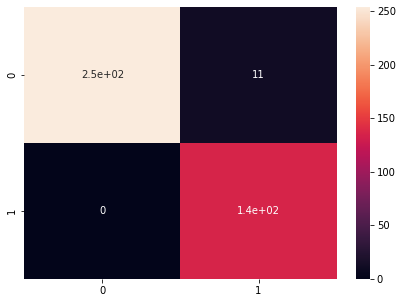

1

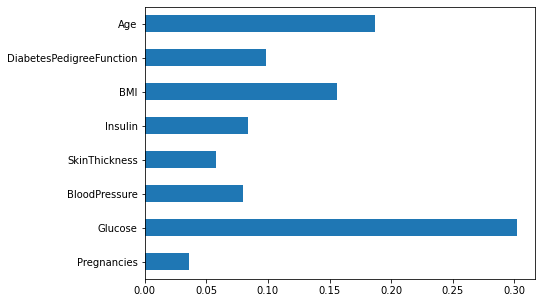

In [130]:
dtree_classifier()


In [131]:
pickle_in_svc = open('svc_classifier.pkl','rb')
svc_classifier = pickle.load(pickle_in_svc)

In [132]:
sc_x = StandardScaler()
input_arr = np.array([8,179.0,72.000000,42.0,130.0,32.7,0.719,36]).reshape(-1,1)
sc_arr = input_arr.reshape(1,8)
prediction = svc_classifier.predict(sc_arr)
print(prediction)

[1]


C:\Users\Santosh Vishwanathan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [133]:
diab_df_cpy

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2    138.0      62.000000           35.0    126.0  33.6   
1               0     84.0      82.000000           31.0    125.0  38.2   
2               0    145.0      72.403665           29.0    126.0  44.2   
3               0    135.0      68.000000           42.0    250.0  42.3   
4               1    139.0      62.000000           41.0    480.0  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2     75.0      64.000000           24.0     55.0  29.7   
1996            8    179.0      72.000000           42.0    130.0  32.7   
1997            6     85.0      78.000000           29.0    126.0  31.2   
1998            0    129.0     110.000000           46.0    130.0  67.1   
1999            2     81.0      72.000000           15.0     76.0  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.127   47        1  
1                        0.233   23        0  
2                        0.630   31        1  
3                        0.365   24        1  
4                        0.536   21        0  
...                        ...  ...      ...  
1995                     0.370   33        0  
1996                     0.719   36        1  
1997                     0.382   42        0  
1998                     0.319   26        1  
1999                     0.547   25        0  

[2000 rows x 9 columns]

In [134]:
diab_df_cpy[diab_df_cpy['Outcome'] == 1]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2    138.0      62.000000           35.0    126.0  33.6   
2               0    145.0      72.403665           29.0    126.0  44.2   
3               0    135.0      68.000000           42.0    250.0  42.3   
11              4    125.0      70.000000           18.0    122.0  28.9   
16              7    195.0      70.000000           33.0    145.0  25.1   
...           ...      ...            ...            ...      ...   ...   
1986            6    104.0      74.000000           18.0    156.0  29.9   
1991            6    102.0      82.000000           29.0    126.0  30.8   
1992            6    134.0      70.000000           23.0    130.0  35.4   
1996            8    179.0      72.000000           42.0    130.0  32.7   
1998            0    129.0     110.000000           46.0    130.0  67.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.127   47        1  
2                        0.630   31        1  
3                        0.365   24        1  
11                       1.144   45        1  
16                       0.163   55        1  
...                        ...  ...      ...  
1986                     0.722   41        1  
1991                     0.180   36        1  
1992                     0.542   29        1  
1996                     0.719   36        1  
1998                     0.319   26        1  

[684 rows x 9 columns]

In [135]:
input_arr = np.array([8,179.0,72.000000,42.0,130.0,32.7,0.719,36]).reshape(-1,1)
sc_arr = sc_x.fit_transform(input_arr)
sc_arr = sc_arr.reshape(1,8)
prediction = svc_classifier.predict(sc_arr)
print(prediction)

[0]


C:\Users\Santosh Vishwanathan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [136]:
res

{'Random Forest': 98.5,
 'Decision Tree': 97.25,
 'Logistic Regression': 78.5,
 'SVC': 99.43019943019942}

In [137]:
df_res = pd.DataFrame(res,index = [i for i in range(1)])

In [138]:
df_res.columns

Index(['Random Forest', 'Decision Tree', 'Logistic Regression', 'SVC'], dtype='object')

C:\Users\Santosh Vishwanathan\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0'>

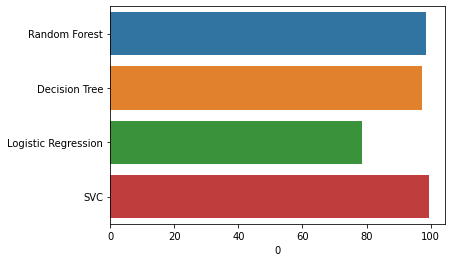

In [139]:
x = df_res.loc[0]
y = df_res.columns
sns.barplot(x,y)

C:\Users\Santosh Vishwanathan\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


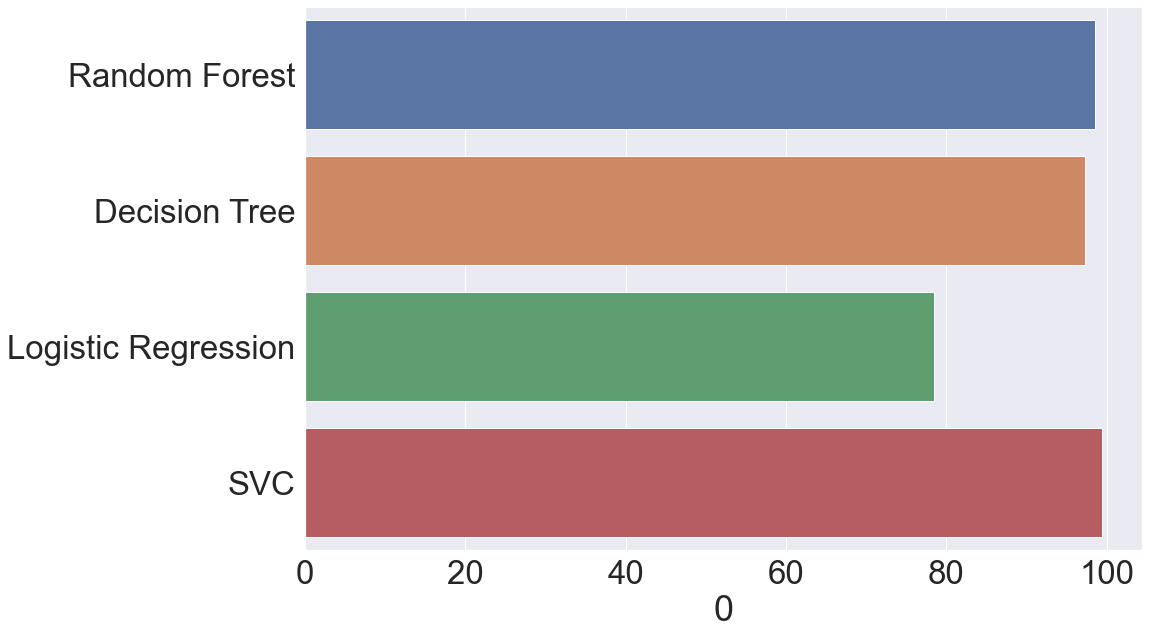

In [151]:
df_res = pd.DataFrame(res,index = [i for i in range(1)])
x = df_res.loc[0]
y = df_res.columns
plt.subplots(figsize = (15,10))
sns.set(font_scale = 2)
sns.barplot(x,y)
plt.savefig('pages/images/res_plot.png')

In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0